## Decision Tree Regression

* A **Decision Tree Regressor** predicts the target by **splitting the data into regions (intervals)** based on decision rules.
* It works by creating a **tree-like structure** where each split reduces the variance of the target variable.

### Formula (Conceptual):

Unlike regression equations (like Linear or Polynomial),
**Decision Trees do not produce a continuous formula.**
Instead, they follow a **piecewise constant function**:

$
\hat{y}(x) = \frac{1}{N\_j} \sum\_{i \in R\_j} y\_i, \quad x \in R\_j
$

Where:

* **$R\_j$** → A region (leaf node) of the tree
* **$N\_j$** → Number of training samples in region $R\_j$
* **$y\_i$** → Actual values of samples in $R\_j$

So, the prediction is the **average of target values** within the region where $x$ falls.


### Explanation:

* **Splits input space** into intervals (like `Level < 5`, `Level ≥ 5`).
* Each interval (leaf node) has a **constant prediction** = mean of training samples in that region.
* Unlike Linear/Polynomial/SVR, Decision Trees create a **stepwise prediction curve** (jumps at split points).


### What it means:

* Instead of fitting a **line (Linear Regression)** or **smooth curve (SVR/Polynomial Regression)**,
  Decision Trees create a **staircase-shaped function**.
* Good at capturing **non-linear relationships** but may **overfit** if tree depth is too large.


### Example: Position vs Salary (Non-linear Growth)

Suppose Salary jumps at certain career levels instead of increasing smoothly.
Decision Trees capture these jumps as **flat plateaus**.

| Level (x) | Actual Salary (Y) | Linear Predicted | Polynomial Predicted | Decision Tree Predicted |
| --------- | ----------------- | ---------------- | -------------------- | ----------------------- |
| 1         | 45k               | 40k              | 44k                  | 45k                     |
| 3         | 60k               | 55k              | 61k                  | 60k                     |
| 6         | 150k              | 100k             | 140k                 | 150k                    |
| 10        | 1M                | 300k             | 950k                 | 1M                      |

Notice how Decision Tree Regression **matches exact training points** but produces flat predictions between them.

---

### Solve:

* You are given a [Position\_Salaries.csv dataset](https://www.kaggle.com/datasets/chaitanyachandra/data-csv?select=Position_Salaries.csv) containing:

  * **Position** (string, e.g., "Business Analyst", "CEO")
  * **Level** (numeric, 1–10)
  * **Salary** (numeric, target variable)

* Build a **Decision Tree Regression model** to predict Salary from Level.

* Tasks:

  * Load and explore the dataset.
  * Select `Level` as the independent variable and `Salary` as the dependent variable.
  * Train a **Decision Tree Regressor** (`DecisionTreeRegressor` from sklearn).
  * Plot predictions vs actual salaries.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data-set
dataset = pd.read_csv("/kaggle/input/data-csv/Position_Salaries.csv")
independent_x = dataset.iloc[:, 1:-1].values
dependent_y = dataset.iloc[:, -1].values 
dependent_y = dependent_y.reshape(len(dependent_y), 1)
independent_x, dependent_y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]))

In [3]:
# train 
from sklearn.tree import  DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(independent_x, dependent_y)

DecisionTreeRegressor()

In [4]:
# predict
regressor.predict([[6.5]])

array([150000.])

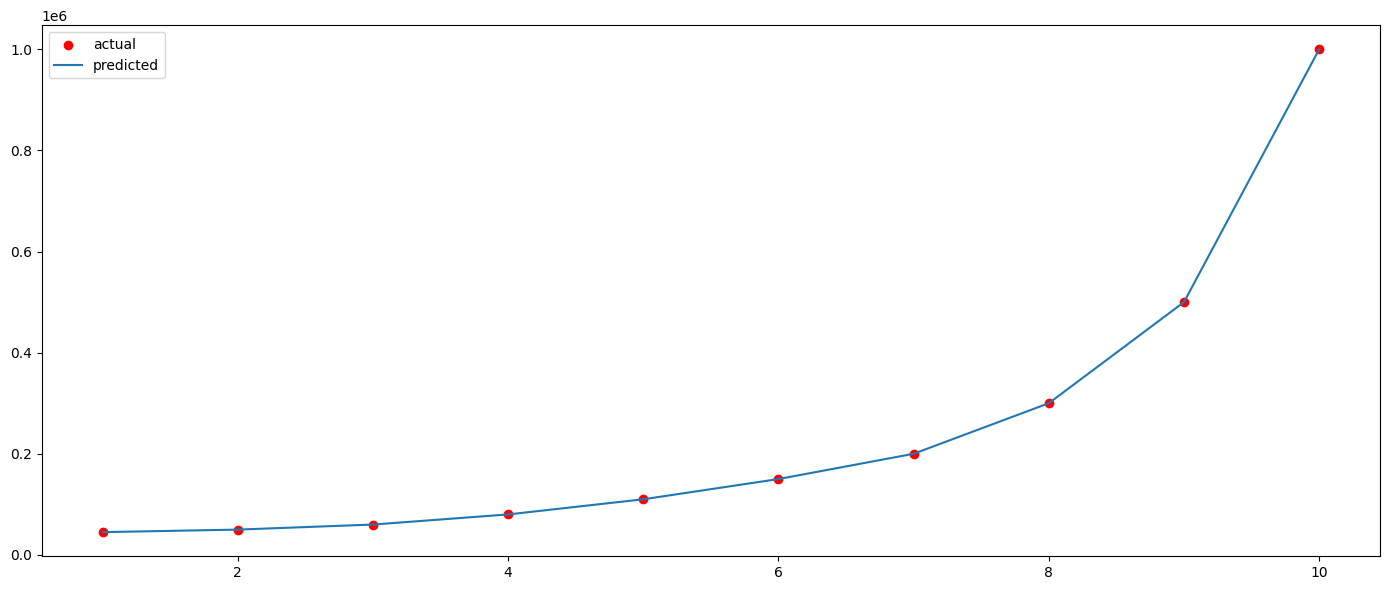

In [5]:
# plot
plt.figure(figsize=(14, 6))
plt.scatter(independent_x, dependent_y, color="red", label="actual")
plt.plot(independent_x, regressor.predict(independent_x), label="predicted")
plt.legend()
plt.tight_layout()
plt.show()